In [1]:
using PyPlot

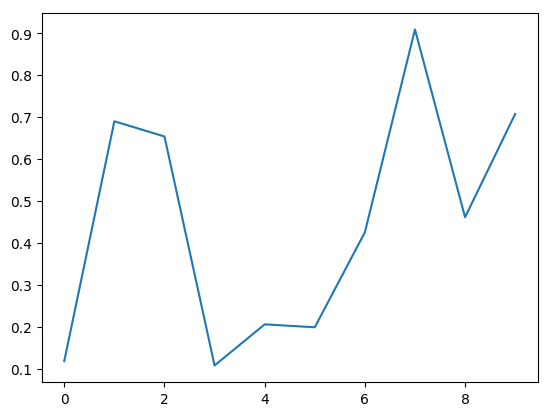

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6df0ff63d0>

In [2]:
plot(rand(10))

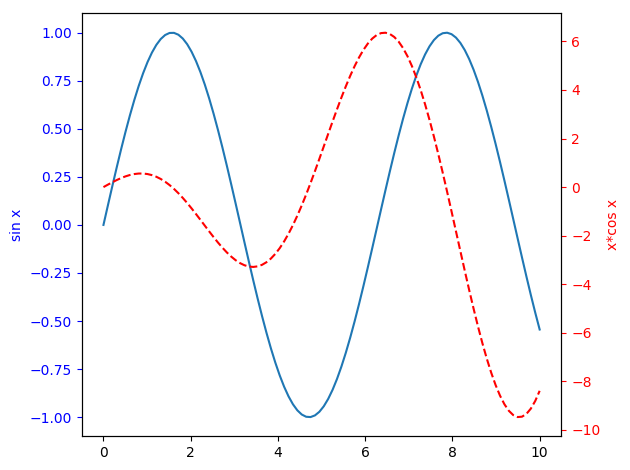

In [16]:
fig, ax1 = subplots()
x = linspace(0,10,100)
ax1[:plot](x, sin.(x))
ax1[:set_ylabel]("sin x", color="b")
ax1[:tick_params]("y", colors = "b")

ax2 = ax1[:twinx]()
ax2[:plot](x, x.*cos.(x), "--r")
ax2[:set_ylabel]("x*cos x", color="r")
ax2[:tick_params]("y", colors = "r")

tight_layout()


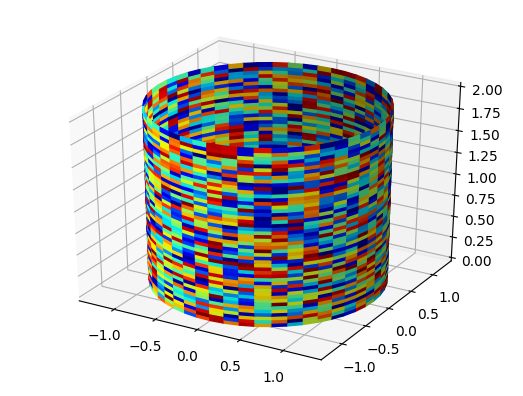

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f6dcbd56050>

In [44]:
fig = figure()
ax = fig[:add_subplot](111, projection = "3d")
r = linspace(1.25, 1.25, 50)
p = linspace(0, 2π, 50)
R = repmat(r, 1, 50)
P = repmat(p', 50, 1)
Zc = rand(50, 50) # (P.^2-1).^2
Z = repmat(linspace(0, 2, 50), 1, 50)
X, Y = R.*cos.(P), R.*sin.(P)
ax[:plot_surface](X, Y, Z, facecolors=PyPlot.cm[:jet](Zc/maximum(Zc)))

In [1]:
using JFVM

INFO: MUMPS solver (optional) is not available.


In [3]:
m = createMesh3D(5, 6, 7, 1, 1.5, 2)
phi = createCellVariable(m, rand(5, 6, 7))

JFVM.CellValue{Float64}(JFVM.MeshStructure(3, [5, 6, 7], JFVM.CellSize{Float64}([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2], [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25], [0.285714, 0.285714, 0.285714, 0.285714, 0.285714, 0.285714, 0.285714, 0.285714, 0.285714]), JFVM.CellLocation{Float64}([0.1, 0.3, 0.5, 0.7, 0.9], [0.125, 0.375, 0.625, 0.875, 1.125, 1.375], [0.142857, 0.428571, 0.714286, 1.0, 1.28571, 1.57143, 1.85714]), JFVM.FaceLocation{Float64}([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5], [0.0, 0.285714, 0.571429, 0.857143, 1.14286, 1.42857, 1.71429, 2.0]), [1, 7, 50, 56, 449, 455, 498, 504], [57, 63, 106, 112, 113, 119, 162, 168, 169, 175  …  450, 451, 452, 453, 454, 499, 500, 501, 502, 503]), [0.0 0.0 … 0.0 0.0; 0.0 0.93416 … 0.93372 0.0; … ; 0.0 0.755145 … 0.800395 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.93416 … 0.93372 0.0; 0.93416 0.93416 … 0.93372 0.93372; … ; 0.755145 0.755145 … 0.800395 0.800395; 0.0 0.755145 … 0.800395 0.0]

[0.0 0.703319 … 0.879446 0.0; 0.

In [5]:
Nx = phi.domain.dims[1]
Ny = phi.domain.dims[2]
Nz = phi.domain.dims[3]
x=[phi.domain.facecenters.x[1]; phi.domain.cellcenters.x; phi.domain.facecenters.x[end]]
y=zeros(1,Ny+2)
y[:]=[phi.domain.facecenters.y[1]; phi.domain.cellcenters.y; phi.domain.facecenters.y[end]]
z=zeros(1,1,Nz+2)
z[:]=[phi.domain.facecenters.z[1]; phi.domain.cellcenters.z; phi.domain.facecenters.z[end]]

phi0 = Base.copy(phi.value)
phi0[:,1,:]=0.5*(phi0[:,1,:]+phi0[:,2,:])
phi0[:,end,:]=0.5*(phi0[:,end-1,:]+phi0[:,end,:])
phi0[:,:,1]=0.5*(phi0[:,:,1]+phi0[:,:,1])
phi0[:,:,end]=0.5*(phi0[:,:,end-1]+phi0[:,:,end])
phi0[1,:,:]=0.5*(phi0[1,:,:]+phi0[2,:,:])
phi0[end,:,:]=0.5*(phi0[end-1,:,:]+phi0[end,:,:])

vmin = minimum(phi0)
vmax = maximum(phi0)

a=ones(Nx+2,Ny+2,Nz+2)
X = x.*a
Y = y.*a
Z = z.*a;

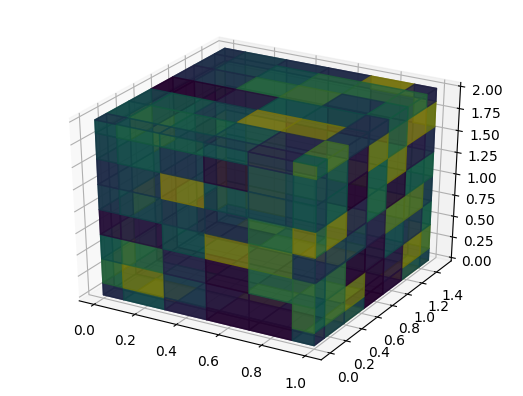

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f74699ef110>

In [20]:
fig = figure()
ax = fig[:add_subplot](111, projection = "3d")
# r = linspace(1.25, 1.25, 50)
# p = linspace(0, 2π, 50)
# R = repmat(r, 1, 50)
# P = repmat(p', 50, 1)
# Zc = rand(50, 50) # (P.^2-1).^2
# Z = repmat(linspace(0, 2, 50), 1, 50)
# X, Y = R.*cos.(P), R.*sin.(P)
ax[:plot_surface](X[1,:,:], Y[1,:,:], Z[1,:,:], facecolors=PyPlot.cm[:viridis](phi0[1,:,:]/maximum(phi0)), alpha=0.8)
ax[:plot_surface](X[end,:,:], Y[end,:,:], Z[end,:,:], facecolors=PyPlot.cm[:viridis](phi0[end,:,:]/maximum(phi0)), alpha=0.8)
ax[:plot_surface](X[:,1,:], Y[:,1,:], Z[:,1,:], facecolors=PyPlot.cm[:viridis](phi0[:,1,:]/maximum(phi0)), alpha=0.8)
ax[:plot_surface](X[:,end,:], Y[:,end,:], Z[:,end,:], facecolors=PyPlot.cm[:viridis](phi0[:,end,:]/maximum(phi0)), alpha=0.8)
ax[:plot_surface](X[:,:,1], Y[:,:,1], Z[:,:,1], facecolors=PyPlot.cm[:viridis](phi0[:,:,1]/maximum(phi0)), alpha=0.8)
ax[:plot_surface](X[:,:,end], Y[:,:,end], Z[:,:,end], facecolors=PyPlot.cm[:viridis](phi0[:,:,end]/maximum(phi0)), alpha=0.8)

In [ ]:
fig = figure()
ax = fig[:add_subplot](111, projection = "3d")
r = linspace(1.25, 1.25, 50)
p = linspace(0, 2π, 50)
R = repmat(r, 1, 50)
P = repmat(p', 50, 1)
Zc = rand(50, 50) # (P.^2-1).^2
Z = repmat(linspace(0, 2, 50), 1, 50)
X, Y = R.*cos.(P), R.*sin.(P)
ax[:plot_surface](X, Y, Z, facecolors=PyPlot.cm[:jet](Zc/maximum(Zc)))

In [8]:
Z[1,:,:]

8×9 Array{Float64,2}:
 0.0  0.142857  0.428571  0.714286  1.0  1.28571  1.57143  1.85714  2.0
 0.0  0.142857  0.428571  0.714286  1.0  1.28571  1.57143  1.85714  2.0
 0.0  0.142857  0.428571  0.714286  1.0  1.28571  1.57143  1.85714  2.0
 0.0  0.142857  0.428571  0.714286  1.0  1.28571  1.57143  1.85714  2.0
 0.0  0.142857  0.428571  0.714286  1.0  1.28571  1.57143  1.85714  2.0
 0.0  0.142857  0.428571  0.714286  1.0  1.28571  1.57143  1.85714  2.0
 0.0  0.142857  0.428571  0.714286  1.0  1.28571  1.57143  1.85714  2.0
 0.0  0.142857  0.428571  0.714286  1.0  1.28571  1.57143  1.85714  2.0